<a href="https://colab.research.google.com/github/asavagar/Insolvencies/blob/main/Insolvencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Company_Insolvencies_SA,Individual_Insolvencies_SA,Difference_Indiv_Minus_Comp,Ratio_Indiv_to_Comp
count,225.0,225.0,225.0,225.0
mean,1543.6,9210.9,7667.4,6.2
std,360.2,1399.7,1288.9,1.5
min,718.0,5788.0,4580.0,3.4
25%,1284.0,8267.0,6801.0,5.3
50%,1485.0,9297.0,7660.0,5.9
75%,1806.0,10010.0,8369.0,6.9
max,2616.0,14213.0,13181.0,13.8


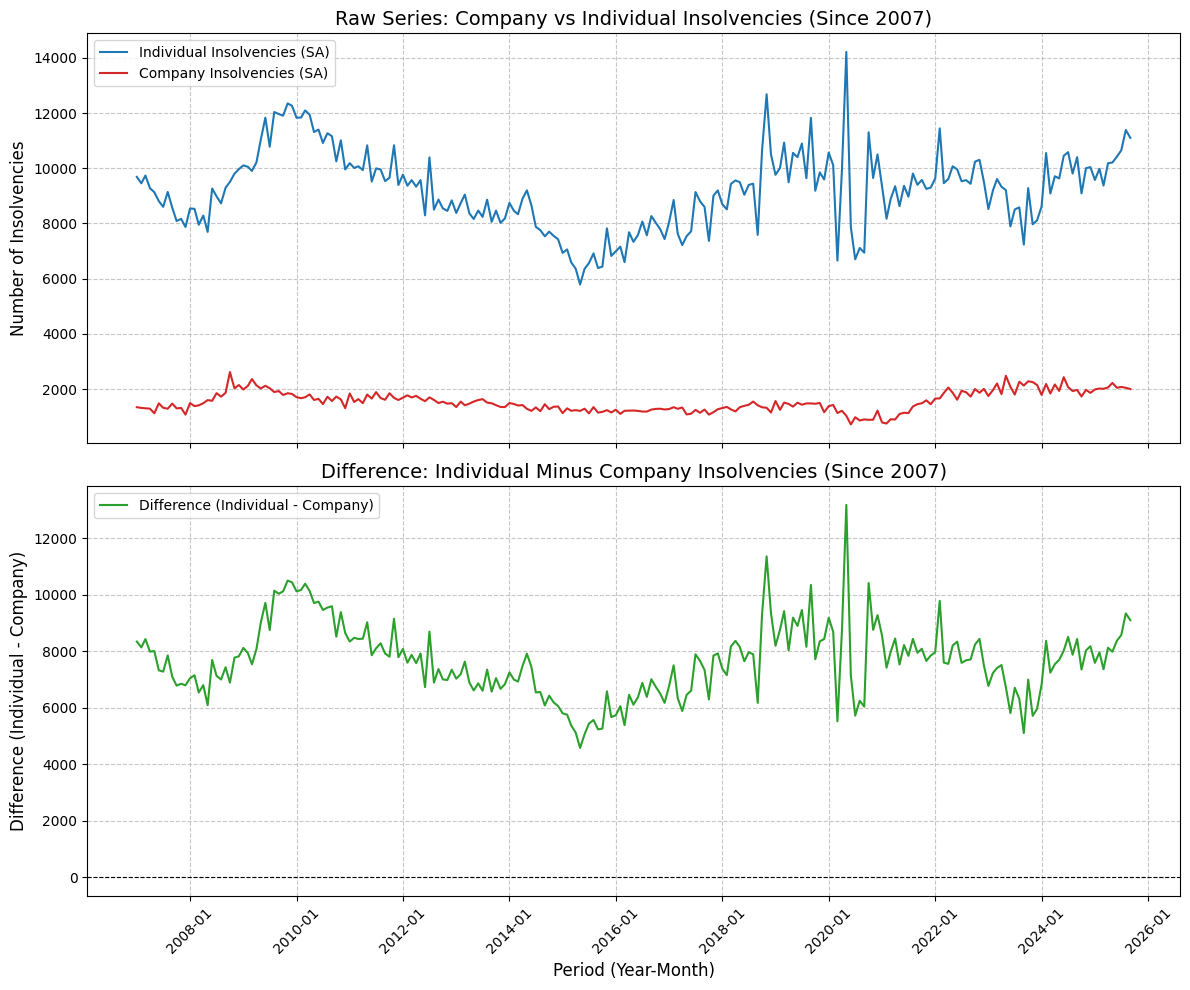

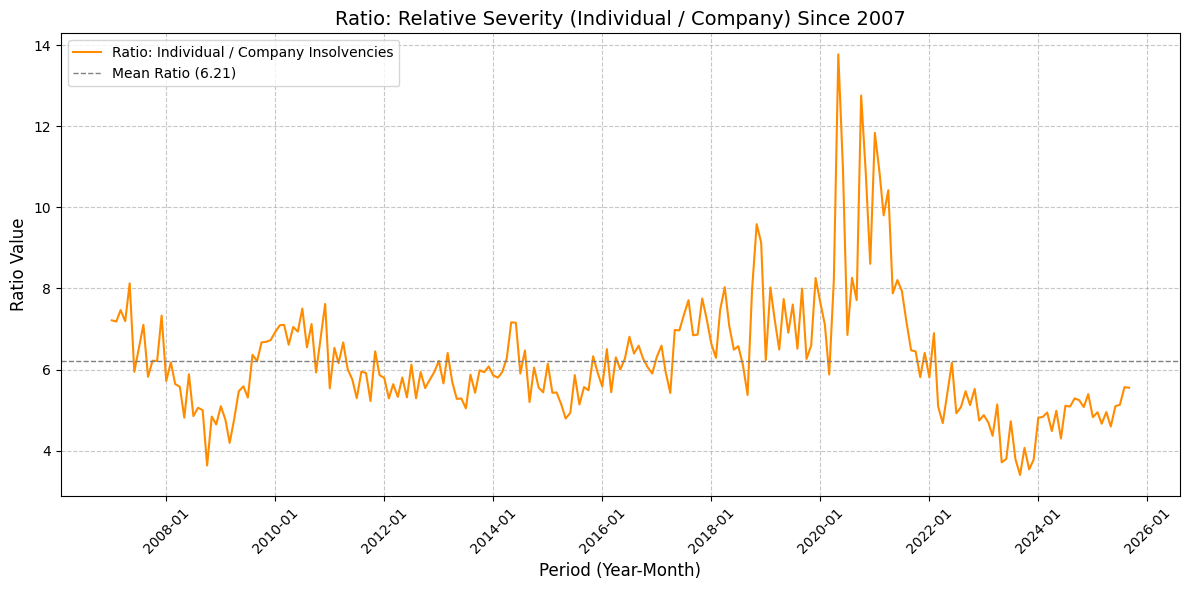

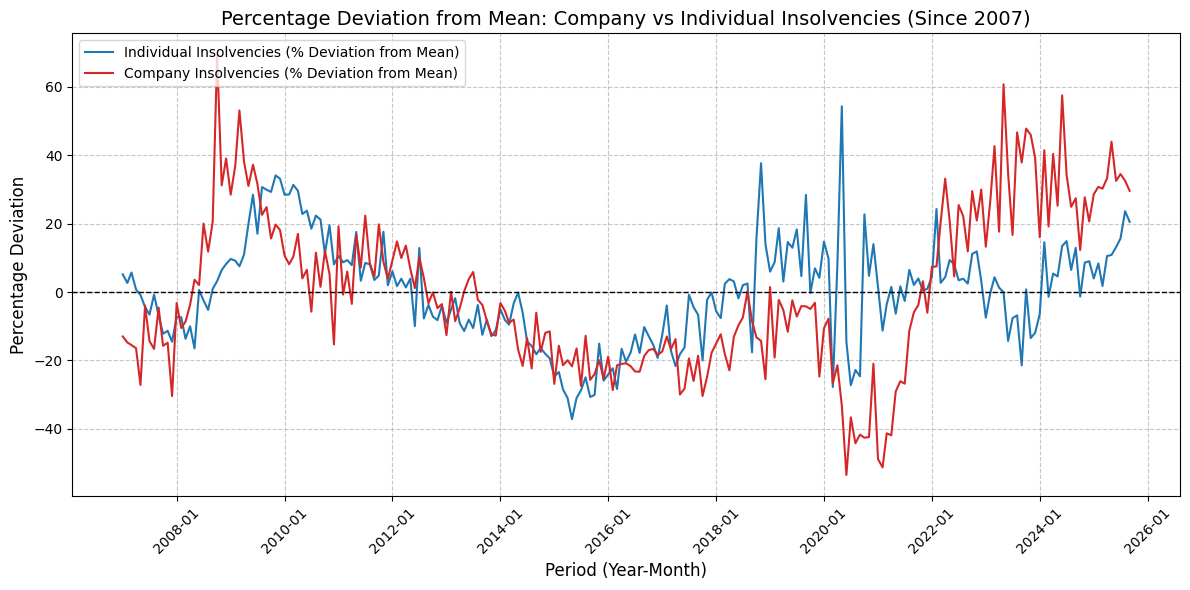

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Data Loading and Merging
company_file_url = "https://storage.googleapis.com/insolvencies/Long-Run_Series_in_CSV_Format_-_Company_Insolvency_Statistics_September_2025.csv"
df_company = pd.read_csv(company_file_url)
individual_file_url = "https://storage.googleapis.com/insolvencies/Long-Run_Series_in_CSV_Format_-_Individual_Insolvency_Statistics_September_2025.csv"
df_individual = pd.read_csv(individual_file_url)

# Select and rename columns
df_company_select = df_company[['period', 'total_ew_sa']].rename(
    columns={'total_ew_sa': 'Company_Insolvencies_SA'}
)
df_individual_select = df_individual[['period', 'EW_total_individuals_SA']].rename(
    columns={'EW_total_individuals_SA': 'Individual_Insolvencies_SA'}
)

# Merge the dataframes on 'period'
df_merged = pd.merge(df_company_select, df_individual_select, on='period', how='inner')
df_merged['period'] = pd.to_datetime(df_merged['period'])

# 2. Filter Data: Since 2007 (after 2006)
df_plot_filtered = df_merged[df_merged['period'].dt.year > 2006].copy()

# 3. Calculations
mean_company = df_plot_filtered['Company_Insolvencies_SA'].mean()
mean_individual = df_plot_filtered['Individual_Insolvencies_SA'].mean()

df_plot_filtered['Difference_Indiv_Minus_Comp'] = df_plot_filtered['Individual_Insolvencies_SA'] - df_plot_filtered['Company_Insolvencies_SA']
df_plot_filtered['Ratio_Indiv_to_Comp'] = df_plot_filtered['Individual_Insolvencies_SA'] / df_plot_filtered['Company_Insolvencies_SA']
df_plot_filtered['Company_Deviation'] = ((df_plot_filtered['Company_Insolvencies_SA'] - mean_company) / mean_company) * 100
df_plot_filtered['Individual_Deviation'] = ((df_plot_filtered['Individual_Insolvencies_SA'] - mean_individual) / mean_individual) * 100

# Generate descriptive statistics for the filtered data
descriptive_stats = df_plot_filtered[['Company_Insolvencies_SA', 'Individual_Insolvencies_SA', 'Difference_Indiv_Minus_Comp', 'Ratio_Indiv_to_Comp']].describe()

# Display the descriptive statistics table
display(descriptive_stats.round(1))

# 4. Plotting

# Function to format axes
def format_axes(ax, title, ylabel, x_ticks=True):
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.7)
    if x_ticks:
        ax.set_xlabel('Period (Year-Month)', fontsize=12)
        ax.xaxis.set_major_locator(mdates.YearLocator(2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.xticks(rotation=45)

# 4a. Raw Series Plot & 4b. Difference Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Raw Series Plot
ax1 = axes[0]
ax1.plot(df_plot_filtered['period'], df_plot_filtered['Individual_Insolvencies_SA'], label='Individual Insolvencies (SA)', color='tab:blue')
ax1.plot(df_plot_filtered['period'], df_plot_filtered['Company_Insolvencies_SA'], label='Company Insolvencies (SA)', color='tab:red')
format_axes(ax1, 'Raw Series: Company vs Individual Insolvencies (Since 2007)', 'Number of Insolvencies', x_ticks=False)

# Difference Plot
ax2 = axes[1]
ax2.plot(df_plot_filtered['period'], df_plot_filtered['Difference_Indiv_Minus_Comp'], label='Difference (Individual - Company)', color='tab:green')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)
format_axes(ax2, 'Difference: Individual Minus Company Insolvencies (Since 2007)', 'Difference (Individual - Company)')

plt.tight_layout()
plt.savefig('Insolvency_Raw_and_Difference_Since_2007.png')
plt.show()
plt.close()

# 4c. Ratio Plot
plt.figure(figsize=(12, 6))
plt.plot(df_plot_filtered['period'], df_plot_filtered['Ratio_Indiv_to_Comp'], label='Ratio: Individual / Company Insolvencies', color='darkorange')
plt.axhline(df_plot_filtered['Ratio_Indiv_to_Comp'].mean(), color='grey', linestyle='--', linewidth=1, label=f'Mean Ratio ({df_plot_filtered["Ratio_Indiv_to_Comp"].mean():.2f})')
format_axes(plt.gca(), 'Ratio: Relative Severity (Individual / Company) Since 2007', 'Ratio Value')
plt.tight_layout()
plt.savefig('Insolvency_Ratio_Since_2007.png')
plt.show()
plt.close()

# 4d. Percentage Deviation Plot
plt.figure(figsize=(12, 6))
plt.plot(df_plot_filtered['period'], df_plot_filtered['Individual_Deviation'], label='Individual Insolvencies (% Deviation from Mean)', color='tab:blue')
plt.plot(df_plot_filtered['period'], df_plot_filtered['Company_Deviation'], label='Company Insolvencies (% Deviation from Mean)', color='tab:red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
format_axes(plt.gca(), 'Percentage Deviation from Mean: Company vs Individual Insolvencies (Since 2007)', 'Percentage Deviation')
plt.tight_layout()
plt.savefig('Insolvency_Deviation_Since_2007.png')
plt.show()
plt.close()

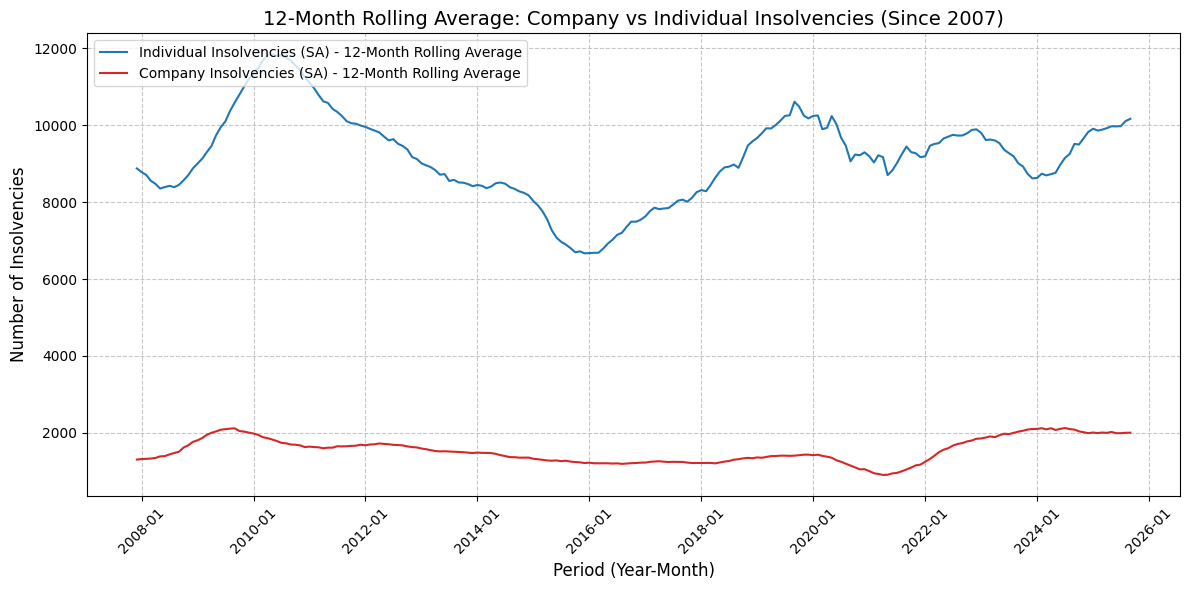

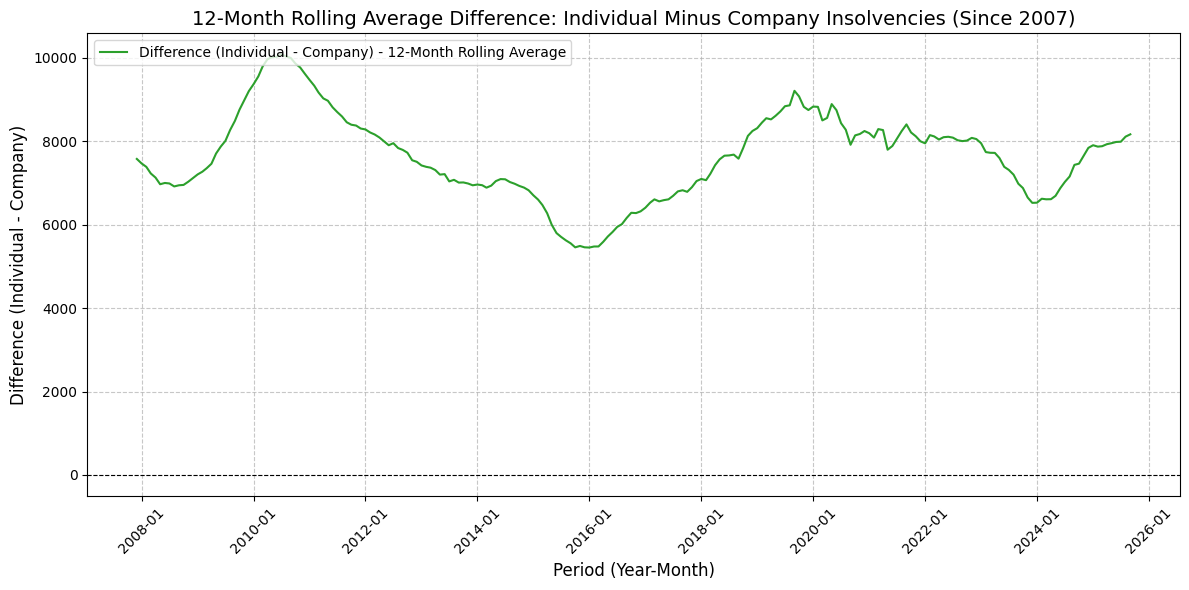

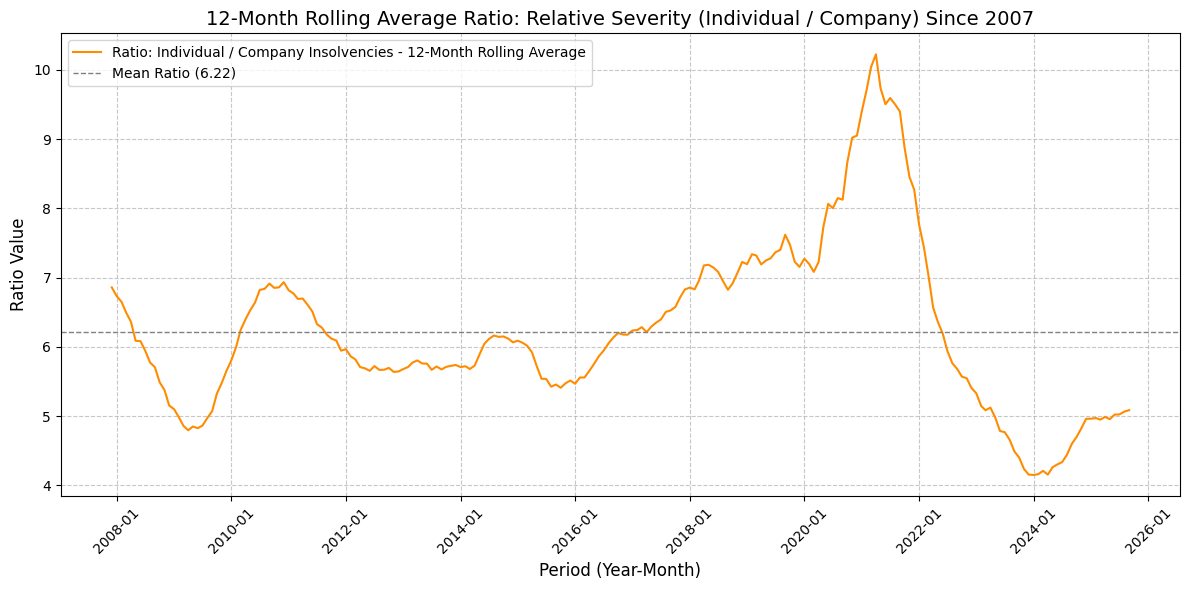

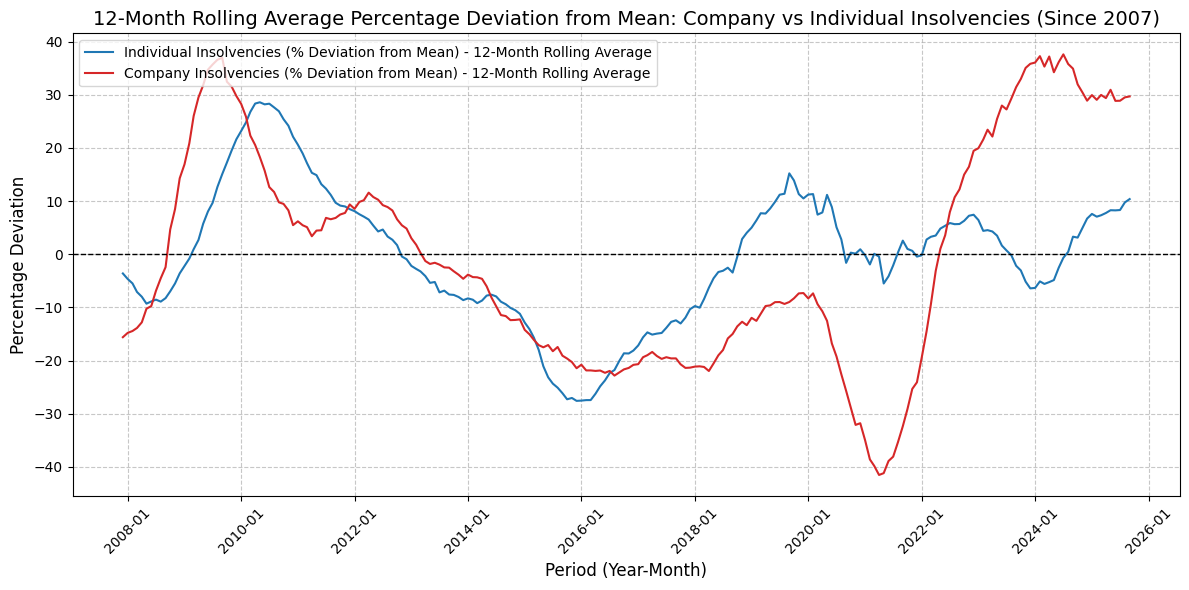

In [ ]:
# 1. Calculate Rolling Averages
window_size = 12

df_plot_filtered['Company_Insolvencies_SA_Rolling'] = df_plot_filtered['Company_Insolvencies_SA'].rolling(window=window_size).mean()
df_plot_filtered['Individual_Insolvencies_SA_Rolling'] = df_plot_filtered['Individual_Insolvencies_SA'].rolling(window=window_size).mean()
df_plot_filtered['Difference_Indiv_Minus_Comp_Rolling'] = df_plot_filtered['Difference_Indiv_Minus_Comp'].rolling(window=window_size).mean()
df_plot_filtered['Ratio_Indiv_to_Comp_Rolling'] = df_plot_filtered['Ratio_Indiv_to_Comp'].rolling(window=window_size).mean()
df_plot_filtered['Company_Deviation_Rolling'] = df_plot_filtered['Company_Deviation'].rolling(window=window_size).mean()
df_plot_filtered['Individual_Deviation_Rolling'] = df_plot_filtered['Individual_Deviation'].rolling(window=window_size).mean()

# Create a new DataFrame with all the relevant time series data and the 'period' column
df_all_series = df_plot_filtered[[
    'period',
    'Company_Insolvencies_SA',
    'Individual_Insolvencies_SA',
    'Difference_Indiv_Minus_Comp',
    'Ratio_Indiv_to_Comp',
    'Company_Deviation',
    'Individual_Deviation',
    'Company_Insolvencies_SA_Rolling',
    'Individual_Insolvencies_SA_Rolling',
    'Difference_Indiv_Minus_Comp_Rolling',
    'Ratio_Indiv_to_Comp_Rolling',
    'Company_Deviation_Rolling',
    'Individual_Deviation_Rolling'
]].copy()

# Save the new DataFrame to a CSV file
df_all_series.to_csv('all_insolvency_time_series_data.csv', index=False)

# 2. Generate Raw Series Rolling Average Plot
plt.figure(figsize=(12, 6))
plt.plot(df_plot_filtered['period'], df_plot_filtered['Individual_Insolvencies_SA_Rolling'], label='Individual Insolvencies (SA) - 12-Month Rolling Average', color='tab:blue')
plt.plot(df_plot_filtered['period'], df_plot_filtered['Company_Insolvencies_SA_Rolling'], label='Company Insolvencies (SA) - 12-Month Rolling Average', color='tab:red')
format_axes(plt.gca(), '12-Month Rolling Average: Company vs Individual Insolvencies (Since 2007)', 'Number of Insolvencies')
plt.tight_layout()
plt.savefig('Insolvency_Raw_Rolling_Average_Since_2007.png')
plt.show()
plt.close()


# 3. Generate Difference Rolling Average Plot
plt.figure(figsize=(12, 6))
plt.plot(df_plot_filtered['period'], df_plot_filtered['Difference_Indiv_Minus_Comp_Rolling'], label='Difference (Individual - Company) - 12-Month Rolling Average', color='tab:green')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
format_axes(plt.gca(), '12-Month Rolling Average Difference: Individual Minus Company Insolvencies (Since 2007)', 'Difference (Individual - Company)')
plt.tight_layout()
plt.savefig('Insolvency_Difference_Rolling_Average_Since_2007.png')
plt.show()
plt.close()

# 4. Generate Ratio Rolling Average Plot
plt.figure(figsize=(12, 6))
plt.plot(df_plot_filtered['period'], df_plot_filtered['Ratio_Indiv_to_Comp_Rolling'], label='Ratio: Individual / Company Insolvencies - 12-Month Rolling Average', color='darkorange')
plt.axhline(df_plot_filtered['Ratio_Indiv_to_Comp_Rolling'].mean(), color='grey', linestyle='--', linewidth=1, label=f'Mean Ratio ({df_plot_filtered["Ratio_Indiv_to_Comp_Rolling"].mean():.2f})')
format_axes(plt.gca(), '12-Month Rolling Average Ratio: Relative Severity (Individual / Company) Since 2007', 'Ratio Value')
plt.tight_layout()
plt.savefig('Insolvency_Ratio_Rolling_Average_Since_2007.png')
plt.show()
plt.close()


# 5. Generate Percentage Deviation Rolling Average Plot
plt.figure(figsize=(12, 6))
plt.plot(df_plot_filtered['period'], df_plot_filtered['Individual_Deviation_Rolling'], label='Individual Insolvencies (% Deviation from Mean) - 12-Month Rolling Average', color='tab:blue')
plt.plot(df_plot_filtered['period'], df_plot_filtered['Company_Deviation_Rolling'], label='Company Insolvencies (% Deviation from Mean) - 12-Month Rolling Average', color='tab:red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
format_axes(plt.gca(), '12-Month Rolling Average Percentage Deviation from Mean: Company vs Individual Insolvencies (Since 2007)', 'Percentage Deviation')
plt.tight_layout()
plt.savefig('Insolvency_Deviation_Rolling_Average_Since_2007.png')
plt.show()
plt.close()